In [1]:
import os,sys
import json
import subprocess
import pandas as pd
import numpy as np

In [2]:
def mobidb_lite_prediction(indir, uid):
    """prediction use mobidb-lite"""
    cmd = "python /mnt/Storage/home/yuzhaowei/software/mobidb-lite/mobidb-lite.py -bin /mnt/Storage/home/yuzhaowei/software/mobidb-lite/binx -t 7 -o {0}_mobidb_lite.json -l {1}/{0}.fasta" . format(uid, indir)
    # print(cmd)
    # subprocess.run(cmd, check = True, shell = True)
    return(cmd)

def mobidb_lite_summary(uid):
    """summarized all mobidb lite prediction result"""
    
    inf = open("{0}_mobidb_lite.json" . format(uid), "r")
    print(uid)
    try:
        dict_json = json.load(inf)
        regions = dict_json["regions"]
        IDR_region = 0
        for region in regions:
            IDR_region += (region[1] - region[0])
        IDR_content = IDR_region / len(dict_json["p"]) # resiudes in IDR region / all resiudes
        print(IDR_content)
    except:
        IDR_content = 0

    return(IDR_content)

### IDR prediction for transcription regulators in human

In [3]:
indir = "/mnt/Storage/home/yuzhaowei/projects/Factor.Harbor/data/public/ProteinSequence/Human"
df_human_uniprot = pd.read_csv("{0}/CistromeDB_human_factor_uniprot.txt" . format(indir), header = 0, sep = "\t")
human_uids = df_human_uniprot.loc[:, "uniprot_id"].values
outf = open("human_IDR_prediction.sh", "w")
outf.write("source ~/anaconda3/bin/activate py27 \n")
for uid in human_uids:
    if uid != "None":
        cmd = mobidb_lite_prediction(indir, uid)
        outf.write(cmd + "\n")
outf.close()

In [4]:
%%bash

bash human_IDR_prediction.sh

In [1]:
outf2 = open("human_MobiDB_lite.txt", "w")
for uid in np.unique(human_uids):
    if uid != "None":
        outf2.write("{0}\t{1}\n".format(uid, mobidb_lite_summary(uid)))
outf2.close()

### IDR prediction for transcription regulators in mouse

In [5]:
indir = "/mnt/Storage/home/yuzhaowei/projects/Factor.Harbor/data/public/ProteinSequence/Mouse"
df_mouse_uniprot = pd.read_csv("{0}/CistromeDB_mouse_factor_uniprot.txt" . format(indir), header = 0, sep = "\t")
mouse_uids = df_mouse_uniprot.loc[:, "uniprot_id"].values
outf = open("mouse_IDR_prediction.sh", "w")
outf.write("source ~/anaconda3/bin/activate py27 \n")
for uid in mouse_uids:
    if uid != "None":
        cmd = mobidb_lite_prediction(indir, uid)
        outf.write(cmd + "\n")
outf.close()

In [2]:
%%bash

bash mouse_IDR_prediction.sh

In [3]:
outf2 = open("mouse_MobiDB_lite.txt", "w")
for uid in np.unique(mouse_uids):
    if uid != "None":
        outf2.write("{0}\t{1}\n".format(uid, mobidb_lite_summary(uid)))
outf2.close()

### summary

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("ticks")

from matplotlib import cm

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline

In [8]:
import pandas as pd
df_human_mobidb = pd.read_csv("human_MobiDB_lite.txt", header = None, sep = "\t")
df_human_mobidb.columns = ["UID", "fraction"]
print(df_human_mobidb.head())
df_mouse_mobidb = pd.read_csv("mouse_MobiDB_lite.txt", header = None, sep = "\t")
df_mouse_mobidb.columns = ["UID", "fraction"]
print(df_mouse_mobidb.head())

      UID  fraction
0  A0AVK6  0.181084
1  A0PJY2  0.098947
2  A2RRD8  0.000000
3  A6H8Y1  0.409680
4  A6NHJ4  0.000000
          UID  fraction
0  A0A087WPF7  0.659794
1  A0A2R8VHR8  0.000000
2      A2A5K6  0.278235
3      A2A935  0.237647
4      A2A9I7  0.376045


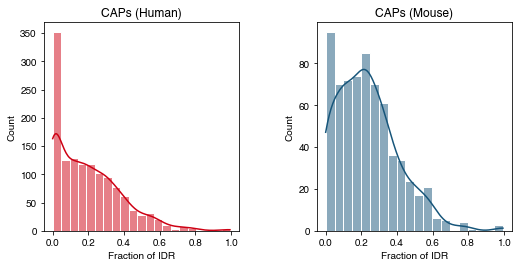

In [25]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_human_mobidb, x = "fraction", kde = True, color = "#CE0013", edgecolor = "white", ax = axs[0])
sns.histplot(data = df_mouse_mobidb, x = "fraction", kde = True, color = "#16557A", edgecolor = "white", ax = axs[1])
axs[0].set_xlabel("Fraction of IDR")
axs[1].set_xlabel("Fraction of IDR")
axs[0].set_title("CAPs (Human)")
axs[1].set_title("CAPs (Mouse)")

plt.subplots_adjust(left = 0.25, bottom = 0.3, wspace = 0.4)
fig.savefig("CAP_IDR_fraction_distribution.pdf")

### IDR percentage of known LLPS protein

In [36]:
df_LLPS_human = pd.read_csv("../../LLPS/LLPS_human_merged.txt", header = 0, sep = "\t")
CAP_LLPS_human = np.unique(df_LLPS_human.loc[:, "UniProt ID"].values)
df_CAP_LLPS_human_mobidb_fraction = df_human_mobidb.loc[df_human_mobidb["UID"].isin(CAP_LLPS_human), :]

In [37]:
df_CAP_LLPS_human_mobidb_fraction

,UID,fraction
7,Q9UKV8,0.030268
39,Q6VMQ6,0.504724
41,P46100,0.486758
55,Q9H165,0.335329
66,P15056,0.238903
...,...,...
958,Q9H0D6,0.146316
959,P46937,0.380952
962,P25490,0.227053
1056,O43670,0.527197


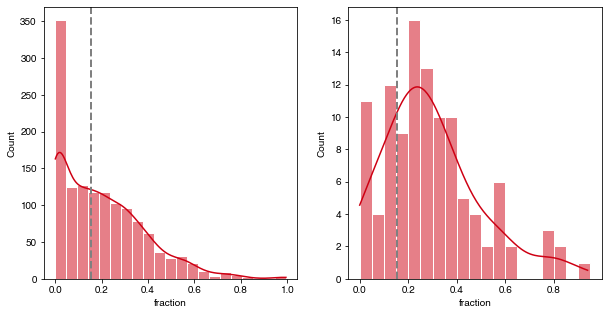

In [62]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_human_mobidb, x = "fraction", kde = True, color = "#CE0013", edgecolor = "white", ax = axs[0])
sns.histplot(data = df_CAP_LLPS_human_mobidb_fraction, x = "fraction", kde = True, color = "#CE0013", 
             binwidth = 0.05, edgecolor = "white", ax = axs[1])

axs[0].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")
axs[1].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")

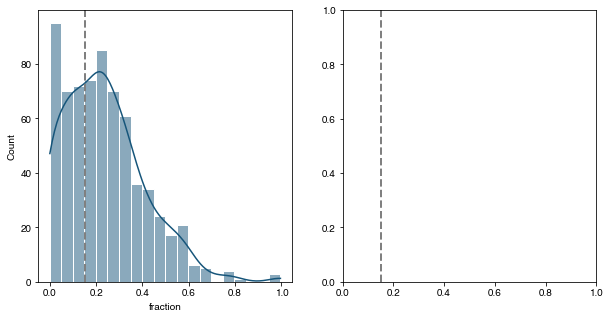

In [64]:
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
sns.histplot(data = df_mouse_mobidb, x = "fraction", kde = True, color = "#16557A", edgecolor = "white", ax = axs[0])

axs[0].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")
axs[1].axvline(x = 0.153, color = "grey", linewidth = 2, linestyle = "--")

In [61]:
np.quantile(df_CAP_LLPS_human_mobidb_fraction.loc[:,"fraction"], q = np.linspace(0,1,5))

array([0.        , 0.15300979, 0.25773035, 0.38527134, 0.93884409])